# Red Wine Quality Prediction

# Problem statement

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods

# Solution:-

In [86]:
#Importing necessary libraries
import pandas as pd
import numpy as np
path ='https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv(path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [87]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [88]:
df.tail().T

,1594,1595,1596,1597,1598
fixed acidity,6.2000,5.90000,6.30000,5.90000,6.00000
volatile acidity,0.6000,0.55000,0.51000,0.64500,0.31000
citric acid,0.0800,0.10000,0.13000,0.12000,0.47000
residual sugar,2.0000,2.20000,2.30000,2.00000,3.60000
chlorides,0.0900,0.06200,0.07600,0.07500,0.06700
free sulfur dioxide,32.0000,39.00000,29.00000,32.00000,18.00000
total sulfur dioxide,44.0000,51.00000,40.00000,44.00000,42.00000
density,0.9949,0.99512,0.99574,0.99547,0.99549
pH,3.4500,3.52000,3.42000,3.57000,3.39000
sulphates,0.5800,0.76000,0.75000,0.71000,0.66000


In [89]:
#All columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [90]:
#Find nulls
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

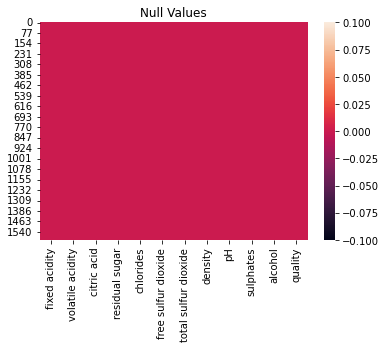

In [92]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [93]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Analyse the data

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

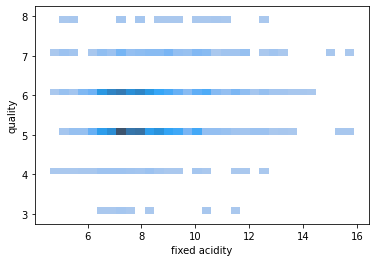

In [94]:
sns.histplot(x="fixed acidity",y="quality",data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

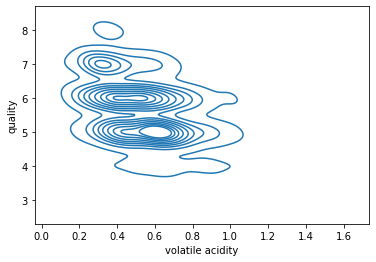

In [95]:
sns.kdeplot(x="volatile acidity",y="quality",data=df)

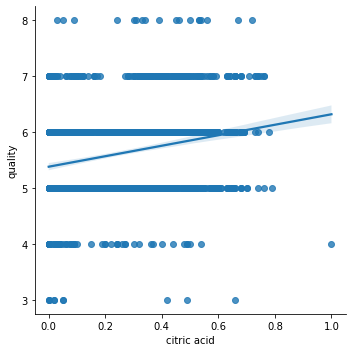

In [108]:
sns.lmplot(x="citric acid",y="quality",data=df)

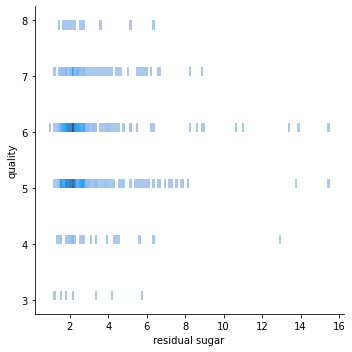

In [109]:
sns.displot(x="residual sugar",y="quality",data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

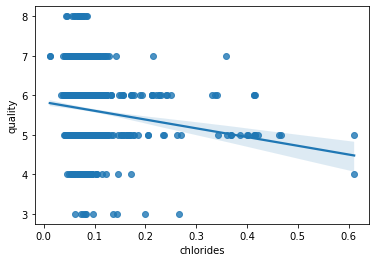

In [110]:
sns.regplot(x="chlorides",y="quality",data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

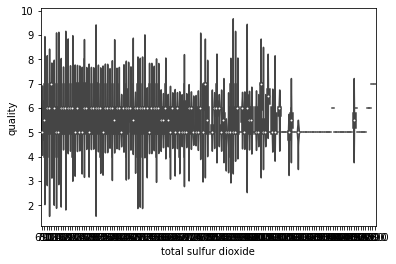

In [111]:
sns.violinplot(x="total sulfur dioxide",y="quality", data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

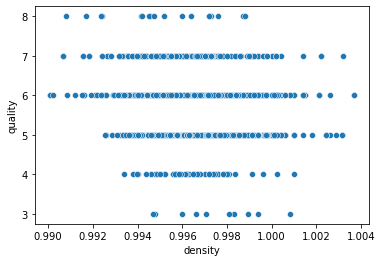

In [112]:
sns.scatterplot(x="density",y="quality",data=df)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

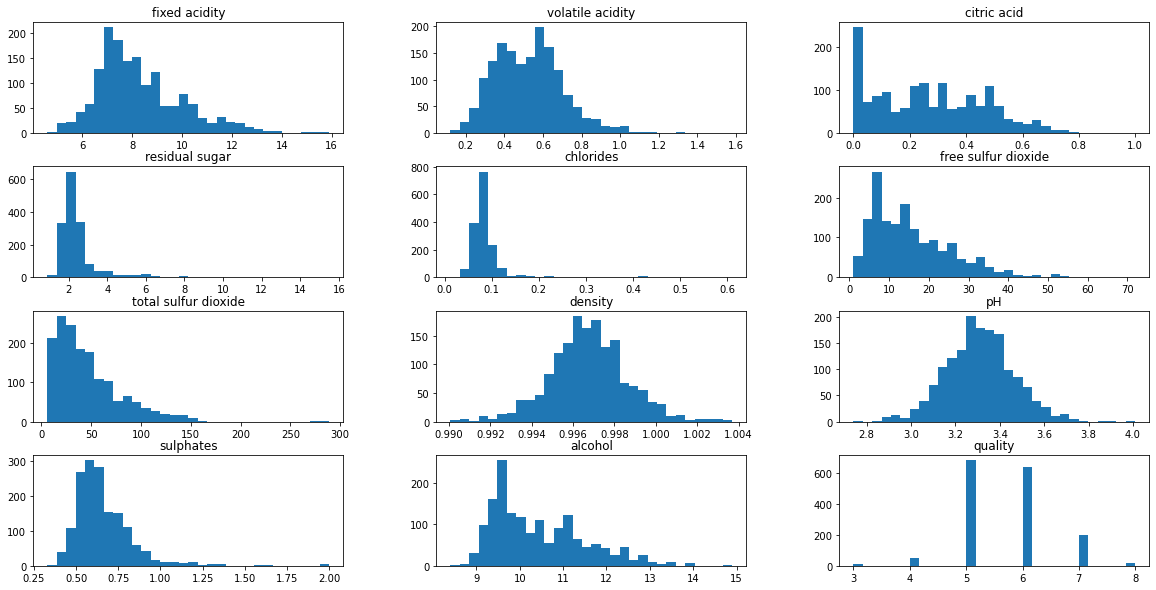

In [113]:
df.hist(figsize=(20,10),grid=False,layout=(4,3),bins=30)

In [ ]:
sns.pairplot(df)

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()['quality'].sort_values()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,18))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".2f")

### Outcome of Coorelation

In [ ]:
df.plot(kind='density',subplots=True,layout=(4,3),sharex=False,legend=False,fontsize=1,figsize=(18,12))

### Discriptive Statistics

In [ ]:
# Describing Datasets
df.describe()

In [ ]:
plt.figure(figsize=(15,17))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.5,linecolor="black",fmt="f")

In [ ]:
df.info()

### Splitting the data to remove the skewness

In [ ]:
df.iloc[:,:-1]

In [ ]:
df.iloc[:,:-1].skew()

Setting the standard skewness value +/- 0.5

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [ ]:
df.iloc[:,:-1].skew()

### Outliers Checking

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,18))

### IQR Proximity Rule Z - Score Technique

In [ ]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

In [ ]:
threshold=3
print(np.where(z>3))


In [ ]:
len(np.where(z>3)[0])

In [ ]:
df.drop([ 7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  459,  469,  480,  517,  517,  544,  544,  554,  555,  557,
        608,  614,  690,  695,  695,  797,  832,  836,  836,  837,  837,
        889,  899,  909,  914, 1017, 1017, 1018, 1018, 1081, 1114, 1269,
       1270, 1287, 1299, 1299, 1316, 1316, 1321, 1321, 1369, 1374, 1374,
       1434, 1435, 1469, 1478, 1505, 1571],axis=0)

In [ ]:
df=df[(z<3).all(axis=1)]

In [ ]:
df.shape

### Feature Engineering ( Variantion Inflation Factor )

In [ ]:
df.corr()

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="Blues",annot=True)

### splitting tha data for variance inflation checking

In [ ]:
# independent Column
x=df.iloc[:,:-1]
# target
y=df.iloc[:,-1]

In [ ]:
x

In [ ]:
y

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [ ]:
vif_calc()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [ ]:
x.drop(['fixed acidity'],axis=1,inplace=True)

In [ ]:
x

In [ ]:
vif_calc()

### scalling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

### linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
  print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
  print("\n")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=60)

In [ ]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

In [ ]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

### Decission Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

In [ ]:
pred=dtr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

In [ ]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)

In [ ]:
pred=knr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

In [ ]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

### Use Regularization 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

### Ensemble Techniques

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rrf=RandomForestRegressor()

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
clf = GridSearchCV(Rrf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
from sklearn.model_selection import cross_val_score

Rrf= RandomForestRegressor(criterion="mse",max_features="sqrt")
Rrf.fit(x_train,y_train)
Rrf.score(x_train,y_train)
pred_decession = Rrf.predict(x_test)

rfs = r2_score(y_test,pred_decession)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(Rrf,x,y,cv=5)
rfc=rfscore.mean()
print('cross Val Score :',rfc*100)

### Conclusion

In [ ]:
import pickle
filename = 'Redwine.pkl'
pickle.dump(Rrf,open(filename,'wb'))